In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DIABETES/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
import numpy as np
import pandas as pd

# Reemplazamos valores 0 por NaN en las columnas donde 0 no aplica
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Imputamos con la media
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

<ipython-input-86-d70359563b3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
<ipython-input-86-d70359563b3b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)

<ipython-input-87-6e945ad21f25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
<ipython-input-87-6e945ad21f25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# Revisamos si hay valores faltantes después de la imputación
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Verificamos la distribución de las clases
class_distribution = df['Outcome'].value_counts()
print(class_distribution)

Outcome
0    500
1    268
Name: count, dtype: int64


<ipython-input-98-d7802a03d87e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


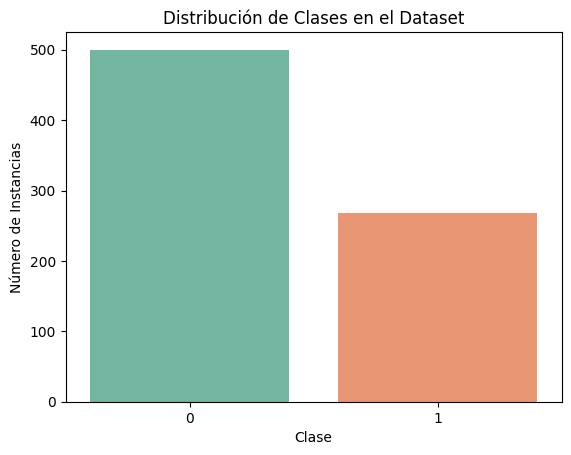

In [ ]:
# Usamos Seaborn para visualizar la distribución
sns.countplot(x='Outcome', data=df, palette='Set2')

# Añadimos títulos y etiquetas
plt.title('Distribución de Clases en el Dataset')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()

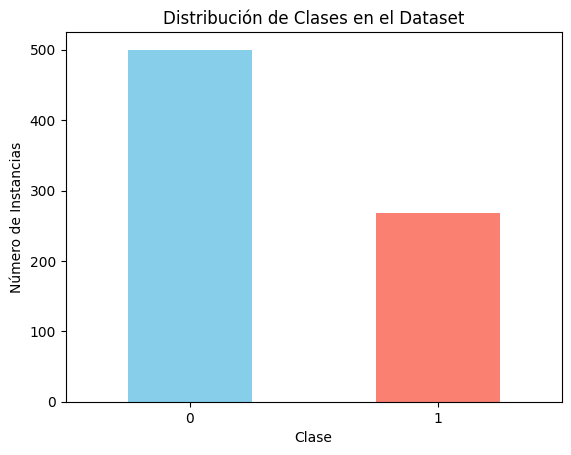

In [ ]:
# Usamos Matplotlib para hacer un gráfico de barras
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])

# Añadimos títulos y etiquetas
plt.title('Distribución de Clases en el Dataset')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)
plt.show()

SEPARAR CONJUNTO DE DATOS

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos características y la variable objetivo
X = df.drop('Outcome', axis=1)  # Features (sin la columna 'Outcome')
y = df['Outcome']  # Target (la columna 'Outcome')

In [ ]:
# Dividimos en 70% para entrenamiento y 30% para validación + test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [ ]:
# Dividimos en 15% validación y 15% testeo
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
print(f"Conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Conjunto de validación: {len(X_val)} muestras")
print(f"Conjunto de prueba: {len(X_test)} muestras")

Conjunto de entrenamiento: 537 muestras
Conjunto de validación: 115 muestras
Conjunto de prueba: 116 muestras


SET DE DATOS DE VALIDACIÓN

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Creamos el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo y validamos en el conjunto de validación
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6923 - loss: 0.6373 - val_accuracy: 0.6609 - val_loss: 0.5760
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7635 - loss: 0.5360 - val_accuracy: 0.6609 - val_loss: 0.5425
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7576 - loss: 0.5142 - val_accuracy: 0.7130 - val_loss: 0.5199
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7831 - loss: 0.4544 - val_accuracy: 0.7130 - val_loss: 0.5093
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7973 - loss: 0.4592 - val_accuracy: 0.7130 - val_loss: 0.4961
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7892 - loss: 0.4621 - val_accuracy: 0.7217 - val_loss: 0.4918
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7836 - loss: 0.4584 - val_accuracy: 0.7304 - val_loss: 0.5022
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7930 - loss: 0.4295 - val_accuracy: 0.7217 - val_loss: 0.

Se probaron 50, 150,200 epocs, pero el rendimiento bajaba por encima de los 30, por lo que se decidió dejar en esa cantidad

Early Stopping (experimentos en gráficos de convergencia indicaban perdida significativa de validación)

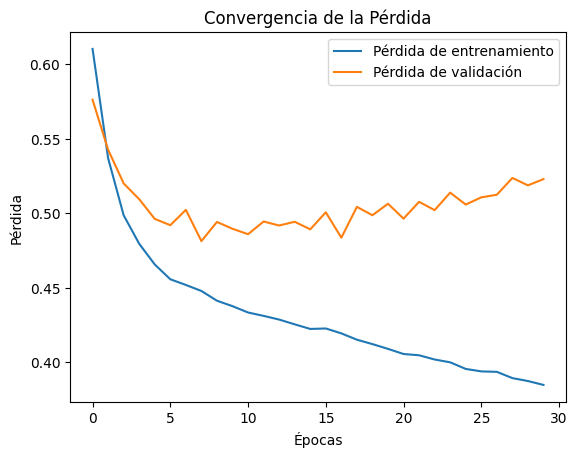

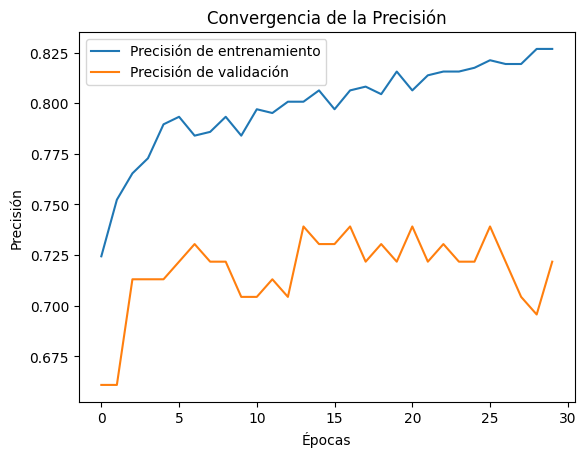

In [ ]:
import matplotlib.pyplot as plt

# Graficamos la pérdida en el entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Convergencia de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficamos la precisión en el entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Convergencia de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [ ]:
# Escalamos los datos de prueba
X_test_scaled = scaler.transform(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        75
           1       0.76      0.46      0.58        41

    accuracy                           0.76       116
   macro avg       0.76      0.69      0.70       116
weighted avg       0.76      0.76      0.74       116



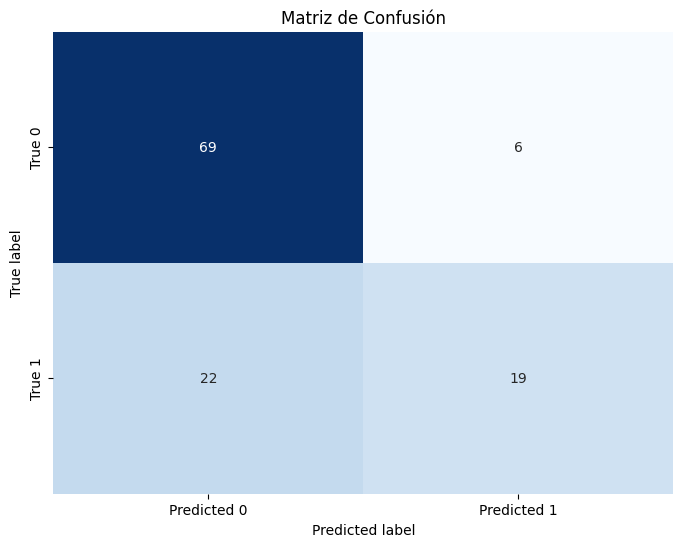

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Normalizamos el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Hacemos predicciones sobre el conjunto de prueba
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluamos el modelo utilizando accuracy, precision, recall y f1-score
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Creamos la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()